<a href="https://colab.research.google.com/github/ankesh86/TimeSeriesAnalysis/blob/main/Forecasting_DeepLearningMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Time-Series Forecasting using LSTM**

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.preprocessing


In [49]:
from sklearn.metrics import r2_score
from keras.layers import Dense, Dropout, SimpleRNN, LSTM
from keras.models import Sequential

## Importing the data

In [50]:
import requests

#data
urlA = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DOM_hourly.csv'

data = pd.read_csv(urlA, index_col='Datetime', parse_dates=['Datetime'])
data.head()


,DOM_MW
Datetime,
2005-12-31 01:00:00,9389.0
2005-12-31 02:00:00,9070.0
2005-12-31 03:00:00,9001.0
2005-12-31 04:00:00,9042.0
2005-12-31 05:00:00,9132.0


In [51]:
data.isna().sum()


DOM_MW    0
dtype: int64

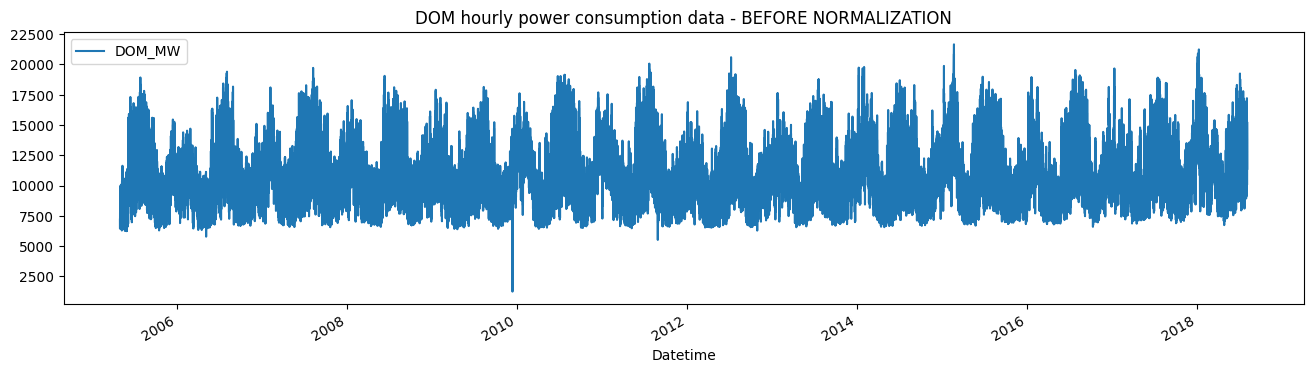

In [52]:
data.plot(figsize=(16,4), legend=True)
plt.title('DOM hourly power consumption data - BEFORE NORMALIZATION')
plt.show()

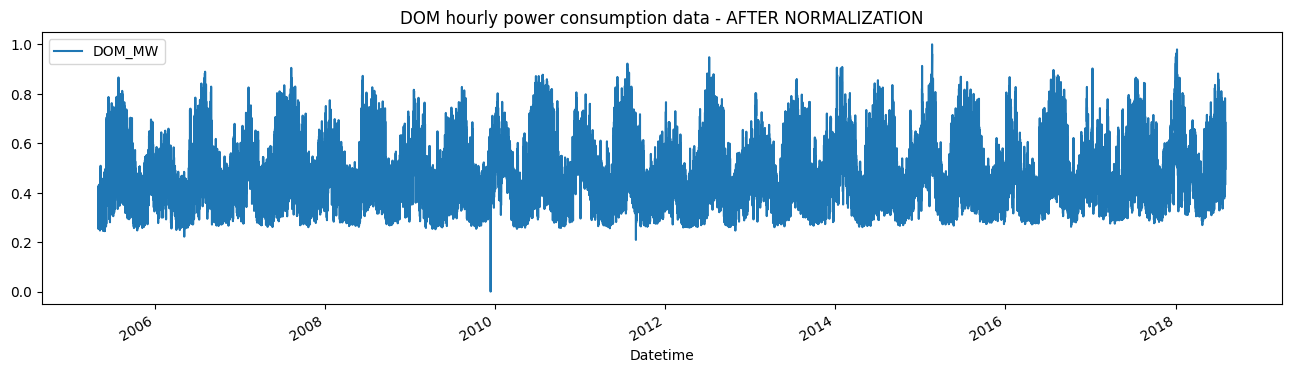

In [54]:
#Normalize DOM hourly power consumption data

def normalize_data(df):
    scaler = sklearn.preprocessing.MinMaxScaler()
    df['DOM_MW']=scaler.fit_transform(df['DOM_MW'].values.reshape(-1,1))
    return df

df_norm = normalize_data(data)
df_norm.shape

#Visualize data after normalization

df_norm.plot(figsize=(16,4),legend=True)

plt.title('DOM hourly power consumption data - AFTER NORMALIZATION')

plt.show()

In [55]:
def data_prep(data, length):
  X=[]
  y=[]

  for i in range(length, len(data)):
    X.append(data.iloc[i - length:i, 0])
    y.append(data.iloc[i,0])

  #test-train split
  train_X = X[:110000]
  train_y = y[:110000]

  train_X = np.array(train_X)
  train_y = np.array(train_y)

  test_X = X[110000:]
  test_y = y[110000:]

  test_X = np.array(test_X)
  test_y = np.array(test_y)

  #reshaping data to required format to input to RNN, LSTM models

  train_X = np.reshape(train_X, (110000, length, 1))
  test_X = np.reshape(test_X, (test_X.shape[0], length, 1))

  return [train_X, train_y, test_X, test_y]



In [57]:
seq_length = 20
train_X, train_y, test_X, test_y = data_prep(df_norm, seq_length)

print('train_X.shape = ',train_X.shape)
print('train_y.shape = ',train_y.shape)
print('test_X.shape = ',test_X.shape)
print('test_y.shape = ',test_y.shape)

train_X.shape =  (110000, 20, 1)
train_y.shape =  (110000,)
test_X.shape =  (6169, 20, 1)
test_y.shape =  (6169,)


In [58]:
model = Sequential()
model.add(LSTM(40, activation="tanh", return_sequences=True, input_shape=(train_X.shape[1], 1)))
model.add(Dropout(0.15))

model.add(LSTM(40, activation="tanh", return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(40, activation="tanh", return_sequences=True))
model.add(Dropout(0.15))

model.add(Dense(1))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 20, 40)            6720      
                                                                 
 dropout_15 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_10 (LSTM)              (None, 20, 40)            12960     
                                                                 
 dropout_16 (Dropout)        (None, 20, 40)            0         
                                                                 
 lstm_11 (LSTM)              (None, 20, 40)            12960     
                                                                 
 dropout_17 (Dropout)        (None, 20, 40)            0         
                                                                 
 dense_5 (Dense)             (None, 20, 1)            

In [ ]:
#fit the model
model.compile(optimizer="adam", loss="MSE")
model.fit(train_X, train_y, epochs=10, batch_size=1000)

Epoch 1/10
110/110 [==============================] - 68s 567ms/step - loss: 0.0473
Epoch 2/10
110/110 [==============================] - 68s 621ms/step - loss: 0.0203
Epoch 3/10
110/110 [==============================] - 68s 617ms/step - loss: 0.0171
Epoch 4/10
110/110 [==============================] - 70s 632ms/step - loss: 0.0157
Epoch 5/10
110/110 [==============================] - 57s 509ms/step - loss: 0.0151
Epoch 6/10
 38/110 [=========>....................] - ETA: 35s - loss: 0.0149

In [ ]:
predictions = model.predict(test_X)
score = r2_score(test_y, predictions)
print("R-Squared Score of LSTM model", score)

In [ ]:
def plotting_actual_vs_pred(y_test, y_pred, title):
  plt.figure(figsize=(16,4))
  plt.plot(y_test, color='blue', label='Actual power consumption data')
  plt.plot(y_pred, alpha=0.7, color='orange', label='Predicted power consumption data')
  plt.title(title)
  plt.xlabel('Time')
  plt.ylabel('Normalized power cosumption scale')
  plt.legend()
  plt.show()


In [ ]:
plotting_actual_vs_pred(test_y, predictions, "Predictions made by LSTM model")

# **GRU**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_datafile = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DailyDelhiClimateTrain.csv'
test_datafile = 'https://raw.githubusercontent.com/ankesh86/TimeSeriesAnalysis/master/Data/DailyDelhiClimateTest.csv'

train_data = pd.read_csv(train_datafile, index_col=0)
# Display dimensions of dataframe
print(train_data.shape)
print(train_data.info())

In [ ]:
print("-----------------------------------------------------------------------")
print("Original dataset  : \n",train_data.sample(10))

In [ ]:
print("-----------------------------------------------------------------------")
# Display statistics for numeric columns
print(train_data.describe())

In [ ]:
print("-----------------------------------------------------------------------")
train_data.plot(figsize=(12,8),subplots=True)

In [ ]:
# Now lets plot them all
train_data.hist(figsize=(12, 16), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
# To check Missing Values
print("null values : \n",train_data.isnull().sum())
sns.heatmap(train_data.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [ ]:
# We choose a specific feature (features). In this example,
my_dataset = train_data[["meantemp",'humidity','wind_speed','meanpressure']]


print("Our new dataset : \n",my_dataset.sample(5))

In [ ]:
print("-----------------------------------------------------------------------")
# ensure all data is float
my_dataset = my_dataset.astype("float32")
values     = my_dataset.values
print("values : \n",values)

In [ ]:
print("-----------------------------------------------------------------------")
# normalize features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
print("scaled : \n",scaled)

In [ ]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [("var%d(t-%d)" % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
              names += [("var%d(t)" % (j+1)) for j in range(n_vars)]
        else:
              names += [("var%d(t+%d)" % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [ ]:
# frame as supervised learning
# reshape into X=t and Y=t+1
i_in  = 100 # past observations
n_out = 1 # future observations
reframed = series_to_supervised(scaled, i_in, n_out)
print("Represent the dataset as a supervised learning problem : \n",reframed.head(10))
print("-----------------------------------------------------------------------")